In [1]:
# EDA Libraries:

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split



import pickle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
def load_data(file_name):
    """Returns a pandas dataframe from a csv file."""
    return pd.read_csv(file_name)

In [3]:
sales = load_data('df_sales.csv')
weather = load_data('weather.csv')


In [4]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [6]:
df_s = join_df(sales, weather, "date")

In [7]:
df_s

,date,dweek,wmonth,sales,tempmax,tempmin,temp,feelslike,windspeed,cloudcover,visibility,icon
0,2021-10-25,Mon,5,110.0,15.8,9.1,12.6,12.6,0.9,35.8,21.7,rain
1,2021-10-26,Tue,5,180.0,16.6,9.1,13.1,13.1,0.9,78.9,20.0,rain
2,2021-10-27,Wed,5,136.0,17.1,14.3,15.4,15.4,1.4,87.4,28.4,cloudy
3,2021-10-28,Thu,5,176.0,15.6,12.1,13.9,13.9,1.1,67.9,27.8,cloudy
4,2021-10-29,Fri,5,96.0,15.3,10.6,13.5,13.5,1.5,66.8,21.9,rain
...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-11-24,Thu,4,232.0,13.3,6.8,9.8,8.5,29.8,52.0,13.5,rain
269,2022-11-25,Fri,4,130.0,12.1,7.3,9.3,7.7,19.0,7.3,13.7,rain
270,2022-11-28,Mon,5,176.0,12.1,6.0,8.4,7.9,11.6,49.0,10.1,rain
271,2022-11-29,Tue,5,244.0,8.1,6.6,7.1,6.3,9.9,99.2,4.9,rain


In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        273 non-null    object 
 1   dweek       273 non-null    object 
 2   wmonth      273 non-null    int64  
 3   sales       265 non-null    float64
 4   tempmax     273 non-null    float64
 5   tempmin     273 non-null    float64
 6   temp        273 non-null    float64
 7   feelslike   273 non-null    float64
 8   windspeed   273 non-null    float64
 9   cloudcover  273 non-null    float64
 10  visibility  273 non-null    float64
 11  icon        273 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 27.7+ KB


In [7]:
def monthlyORyears_sales(data,time=['monthly','years']):
    data = data.copy()
    if time == "monthly":
        # Drop the day indicator from the date column:
        data.date = data.date.apply(lambda x: str(x)[:-3])
    else:
        data.date = data.date.apply(lambda x: str(x)[:4])
        
   # Sum sales per month: 
    data = data.groupby('date')['sales'].sum().reset_index()
    data.date = pd.to_datetime(data.date)
        
    return data
    

In [8]:
df_s.describe()

,wmonth,sales,tempmax,tempmin,temp,feelslike,windspeed,cloudcover,visibility
count,273.000000,265.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,3.190476,164.815094,16.892674,9.624908,13.183516,12.973260,16.798168,53.749817,17.949451
std,1.331319,56.151444,6.361073,4.963659,5.426974,5.571578,10.023023,25.812291,4.817104
min,1.000000,46.000000,3.600000,-2.200000,1.100000,0.500000,0.300000,0.000000,4.900000
25%,2.000000,120.000000,12.100000,6.000000,9.400000,8.500000,11.400000,38.000000,15.100000
50%,3.000000,163.000000,16.500000,9.500000,12.800000,12.700000,17.700000,56.700000,18.200000
75%,4.000000,202.000000,21.100000,13.000000,16.800000,16.800000,22.900000,72.400000,20.500000
max,6.000000,356.000000,39.800000,21.700000,30.200000,29.400000,51.100000,100.000000,35.800000


In [9]:
m_df = monthlyORyears_sales(df_s,"monthly")
m_df.describe()


,sales
count,14.000000
mean,3119.714286
std,1163.265988
min,698.000000
25%,2915.250000
50%,3366.500000
75%,3792.500000
max,4513.000000


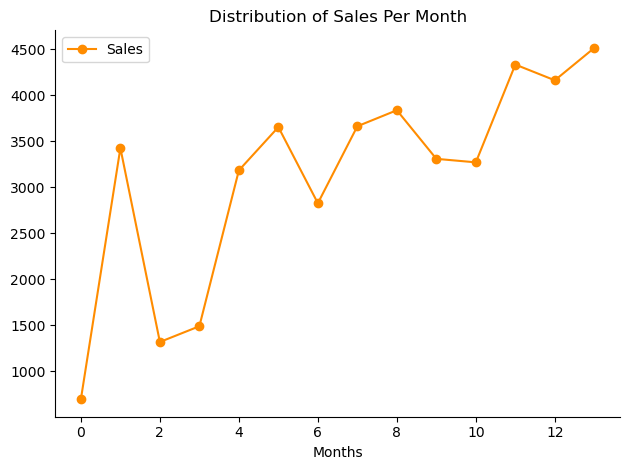

In [10]:
months = m_df['sales'].plot(marker = 'o',color = 'darkorange', label="Sales")

months.set(xlabel = "Months", title = "Distribution of Sales Per Month")

sns.despine()
plt.tight_layout()

months.legend()


In [11]:
import re

def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofyear']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [12]:
add_datepart(df_s, "date", drop=False)

In [13]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        273 non-null    datetime64[ns]
 1   dweek       273 non-null    object        
 2   wmonth      273 non-null    int64         
 3   sales       265 non-null    float64       
 4   tempmax     273 non-null    float64       
 5   tempmin     273 non-null    float64       
 6   temp        273 non-null    float64       
 7   feelslike   273 non-null    float64       
 8   windspeed   273 non-null    float64       
 9   cloudcover  273 non-null    float64       
 10  visibility  273 non-null    float64       
 11  icon        273 non-null    object        
 12  Year        273 non-null    int64         
 13  Month       273 non-null    int64         
 14  Week        273 non-null    int64         
 15  Day         273 non-null    int64         
 16  Dayofyear   273 non-null  

In [14]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize = (15,8))
    sns.lineplot(x_col, y_col, data = data, ax = ax, color = 'darkblue', label='Total Sales')
    
    s_mean = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    s_mean.date = pd.to_datetime(s_mean.date, format='%Y')
    sns.lineplot((s_mean.date + datetime.timedelta(6*365/12)), y_col, data=s_mean, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Years",
           ylabel = "Sales",
           title = title)

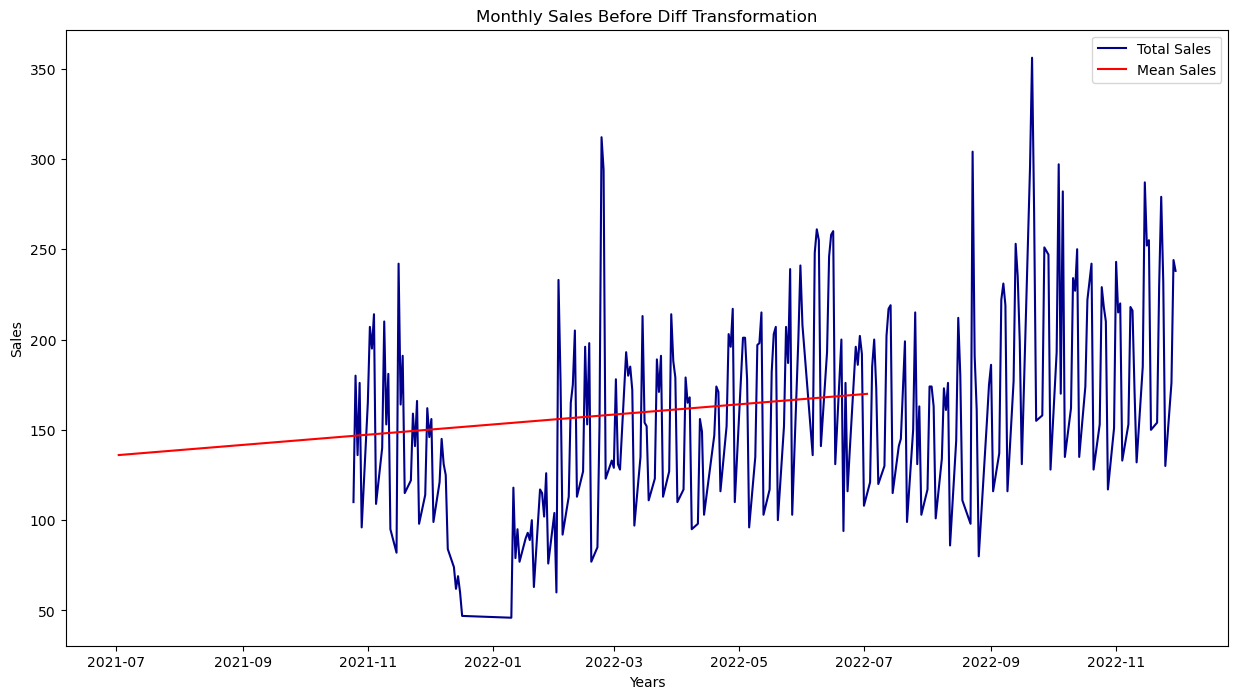

In [15]:
time_plot(df_s, 'date', 'sales', 'Monthly Sales Before Diff Transformation' )


In [16]:
def get_diff(data):
    """Calculate the difference in sales month over month:"""
    
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
        
    return data

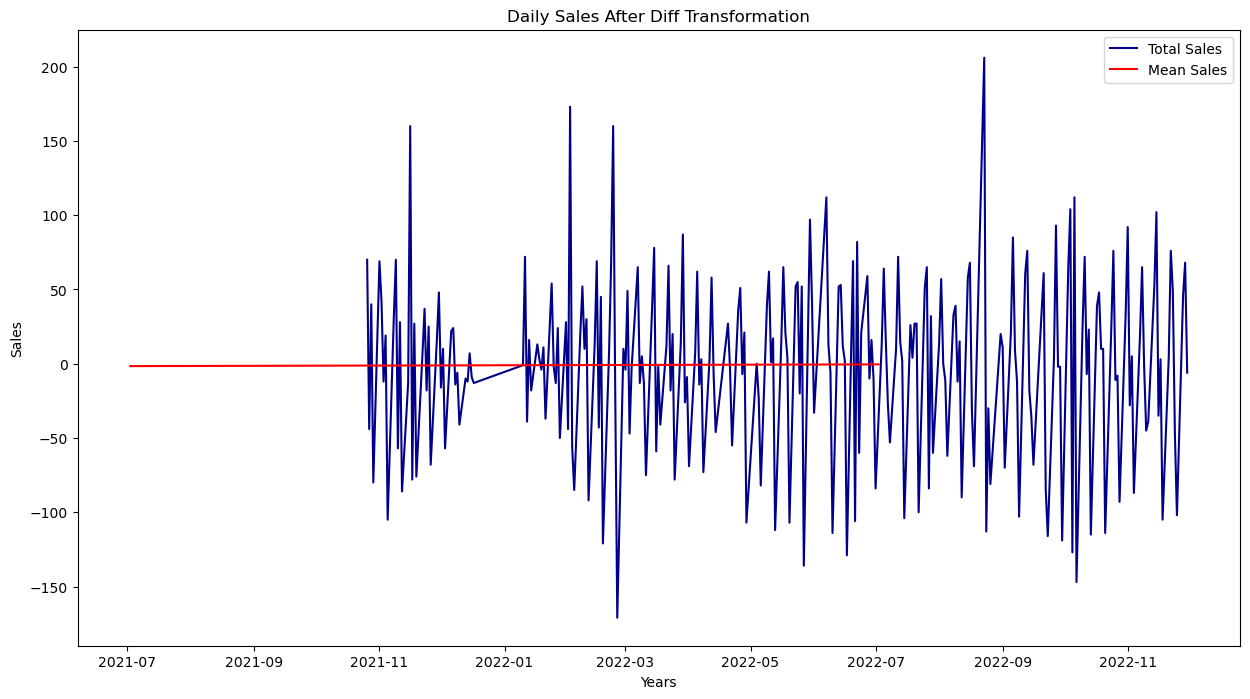

In [17]:
stationary_df = get_diff(df_s)
time_plot(stationary_df, 'date', 'sales_diff', 
          'Daily Sales After Diff Transformation')

In [85]:
# Let's create a data frame for transformation from time series to supervised:

def built_supervised(data):
    supervised_df = data.copy()

    # Create column for each lag:
    for i in range(1, 13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)

    # Drop null values:
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    return supervised_df

In [86]:
model_df = built_supervised(stationary_df)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        246 non-null    datetime64[ns]
 1   dweek       246 non-null    object        
 2   wmonth      246 non-null    int64         
 3   sales       246 non-null    float64       
 4   tempmax     246 non-null    float64       
 5   tempmin     246 non-null    float64       
 6   temp        246 non-null    float64       
 7   feelslike   246 non-null    float64       
 8   windspeed   246 non-null    float64       
 9   cloudcover  246 non-null    float64       
 10  visibility  246 non-null    float64       
 11  icon        246 non-null    object        
 12  Year        246 non-null    int64         
 13  Month       246 non-null    int64         
 14  Week        246 non-null    int64         
 15  Day         246 non-null    int64         
 16  Dayofyear   246 non-null  

In [87]:
dummies = pd.get_dummies(model_df[['dweek','icon']])
model_df = pd.concat([model_df, dummies], axis = 1)
model_df

,date,dweek,wmonth,sales,tempmax,tempmin,temp,feelslike,windspeed,cloudcover,...,lag_11,lag_12,dweek_Fri,dweek_Mon,dweek_Thu,dweek_Tue,dweek_Wed,icon_clear,icon_cloudy,icon_rain
0,2021-11-11,Thu,2,181.0,15.7,10.1,12.1,12.1,0.5,77.1,...,-44.0,70.0,0,0,1,0,0,0,0,1
1,2021-11-12,Fri,2,95.0,15.1,9.7,12.1,12.1,1.2,76.9,...,40.0,-44.0,1,0,0,0,0,0,0,1
2,2021-11-15,Mon,3,82.0,11.8,10.1,11.3,11.3,7.2,92.6,...,-80.0,40.0,0,1,0,0,0,0,0,1
3,2021-11-16,Tue,3,242.0,11.9,5.2,9.6,9.6,0.5,72.4,...,69.0,-80.0,0,0,0,1,0,0,0,1
4,2021-11-17,Wed,3,164.0,12.1,6.1,8.6,8.6,0.7,22.8,...,42.0,69.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2022-11-24,Thu,4,232.0,13.3,6.8,9.8,8.5,29.8,52.0,...,-2.0,65.0,0,0,1,0,0,0,0,1
242,2022-11-25,Fri,4,130.0,12.1,7.3,9.3,7.7,19.0,7.3,...,-45.0,-2.0,1,0,0,0,0,0,0,1
243,2022-11-28,Mon,5,176.0,12.1,6.0,8.4,7.9,11.6,49.0,...,-39.0,-45.0,0,1,0,0,0,0,0,1
244,2022-11-29,Tue,5,244.0,8.1,6.6,7.1,6.3,9.9,99.2,...,53.0,-39.0,0,0,0,1,0,0,0,1


In [88]:
model_df.info() # Supervised Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         246 non-null    datetime64[ns]
 1   dweek        246 non-null    object        
 2   wmonth       246 non-null    int64         
 3   sales        246 non-null    float64       
 4   tempmax      246 non-null    float64       
 5   tempmin      246 non-null    float64       
 6   temp         246 non-null    float64       
 7   feelslike    246 non-null    float64       
 8   windspeed    246 non-null    float64       
 9   cloudcover   246 non-null    float64       
 10  visibility   246 non-null    float64       
 11  icon         246 non-null    object        
 12  Year         246 non-null    int64         
 13  Month        246 non-null    int64         
 14  Week         246 non-null    int64         
 15  Day          246 non-null    int64         
 16  Dayofyea

In [89]:
# model_df = model_df.drop(columns=['date','dweek','icon'])
model_df11 = model_df['sales','l2wday_avg','lwdsales','dweek','sales_diff',pre5d]


In [90]:
from sklearn.preprocessing import LabelEncoder

# model_df = model_df.copy()
le = LabelEncoder()
model_df['dweek_Fri'] = le.fit_transform(model_df['dweek_Fri'])
model_df['dweek_Mon'] = le.fit_transform(model_df['dweek_Mon'])
model_df['dweek_Tue'] = le.fit_transform(model_df['dweek_Tue'])
model_df['dweek_Wed'] = le.fit_transform(model_df['dweek_Wed'])
model_df['dweek_Thu'] = le.fit_transform(model_df['dweek_Thu'])
model_df['icon_clear'] = le.fit_transform(model_df['icon_clear'])
model_df['icon_cloudy'] = le.fit_transform(model_df['icon_cloudy'])
model_df['icon_rain'] = le.fit_transform(model_df['icon_rain'])


In [91]:
X = model_df.drop(columns=['sales'], axis=1)
y = model_df['sales']

X_train, X_rem = train_test_split(X, train_size = 0.80, shuffle=False)
y_train, y_rem = train_test_split(y, train_size = 0.80, shuffle=False)


In [92]:
X_val, X_test = train_test_split(X_rem, test_size = 0.50, shuffle=False)
y_val, y_test = train_test_split(y_rem, test_size = 0.50, shuffle=False)


In [93]:
X_train.shape, X_val.shape, X_test.shape

((196, 35), (25, 35), (25, 35))

In [94]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [95]:
scaler.transform(X_train)

array([[0.2       , 0.33425414, 0.51464435, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.31767956, 0.49790795, ..., 0.        , 0.        ,
        1.        ],
       [0.4       , 0.22651934, 0.51464435, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.4       , 0.44475138, 0.66108787, ..., 0.        , 1.        ,
        0.        ],
       [0.4       , 0.38950276, 0.57322176, ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 0.46132597, 0.68200837, ..., 0.        , 1.        ,
        0.        ]])

#### Linear Regression

In [96]:
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)

y_train_predict_LR = model_LR.predict(X_train_scaled)

X_val_scaled = scaler.transform(X_val)
X_val_scaled

array([[0.6       , 0.44751381, 0.55230126, 0.50515464, 0.52941176,
        0.34448819, 0.369     , 0.45302013, 1.        , 0.72727273,
        0.75      , 0.7       , 0.74780059, 1.00318471, 0.22811671,
        0.61538462, 0.27320955, 0.35809019, 0.40583554, 0.65517241,
        0.61538462, 0.18037135, 0.42175066, 0.47745358, 0.67904509,
        0.50928382, 0.26790451, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.6       , 0.4281768 , 0.71129707, 0.51890034, 0.5432526 ,
        0.25590551, 0.773     , 0.28187919, 1.        , 0.72727273,
        0.75      , 0.73333333, 0.75073314, 1.00636943, 0.14588859,
        0.22811671, 0.61538462, 0.27320955, 0.35809019, 0.40583554,
        0.65517241, 0.61538462, 0.18037135, 0.42175066, 0.47745358,
        0.67904509, 0.50928382, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.8       , 0.32044199, 0.55648536, 0.

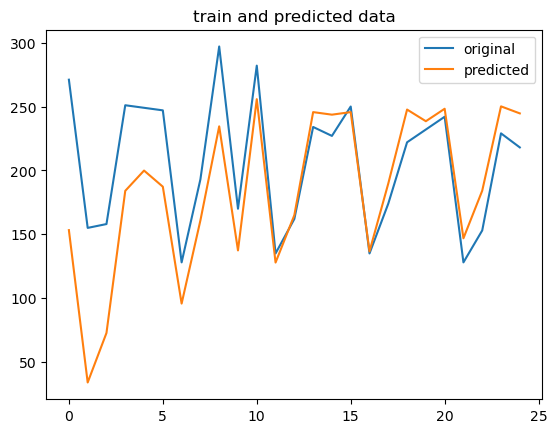

In [97]:
y_val_predict_LR = model_LR.predict(X_val_scaled)

x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_val_predict_LR, label="predicted")
plt.title("train and predicted data")
plt.legend()
plt.show()

In [135]:
r2_li = r2_score(y_val,y_val_predict_LR)
print('R Squared value = ', r2_li)

rmse_li = np.sqrt(mean_squared_error(y_val,y_val_predict_LR))
print('RMSE =', rmse_li)

mse_li = mean_squared_error(y_val, y_val_predict_LR)
print('MSE =', mse_li)

mae_li = mean_absolute_error(y_val, y_val_predict_LR)
print('MAE =', mae_li)

R Squared value =  0.09875368940463036
RMSE = 48.14021837299868
MSE = 2317.480625
MAE = 35.275


#### XGBoost

In [173]:
# xgbr = XGBRegressor(max_depth=2,
#                    subsample=1,
#                    n_estimators=500,
#                    learning_rate=0.05,
#                    min_child_weight=3)

xgbr = XGBRegressor(max_depth=3,
                   subsample=1,
                   n_estimators=1000,
                   learning_rate=0.5,
                   min_child_weight=3)

# xgbr = XGBRegressor(max_depth=5,
#                    subsample=0.8,
#                    n_estimators=500,
#                    learning_rate=0.25,
#                    min_child_weight=3)

xgbr.fit(X_train, y_train)


y_predict_xgbr = xgbr.predict(X_val)
y_train_predict_xgbr = xgbr.predict(X_train)

In [174]:
r2_xgbr1 = r2_score(y_train,y_train_predict_xgbr)
print('R Squared value = ', r2_xgbr1)

rmse_xgbr1 = np.sqrt(mean_squared_error(y_train,y_train_predict_xgbr))
print('RMSE =', rmse_xgbr1)

mse_xgbr1 = mean_squared_error(y_train, y_train_predict_xgbr)
print('MSE =', mse_xgbr1)

mae_xgbr1 = mean_absolute_error(y_train, y_train_predict_xgbr)
print('MAE =', mae_xgbr1)

R Squared value =  0.9999999998690177
RMSE = 0.0006194832285249404
MSE = 3.837594704236835e-07
MAE = 0.0004803599143514828


In [175]:
r2_xgbr = r2_score(y_val,y_predict_xgbr)
print('R Squared value = ', r2_xgbr)

rmse_xgbr = np.sqrt(mean_squared_error(y_val,y_predict_xgbr))
print('RMSE =', rmse_xgbr)

mse_xgbr = mean_squared_error(y_val, y_predict_xgbr)
print('MSE =', mse_xgbr)

mae_xgbr = mean_absolute_error(y_val, y_predict_xgbr)
print('MAE =', mae_xgbr)

R Squared value =  0.6696188252855444
RMSE = 29.14700614762048
MSE = 849.547967369426
MAE = 21.852506103515626


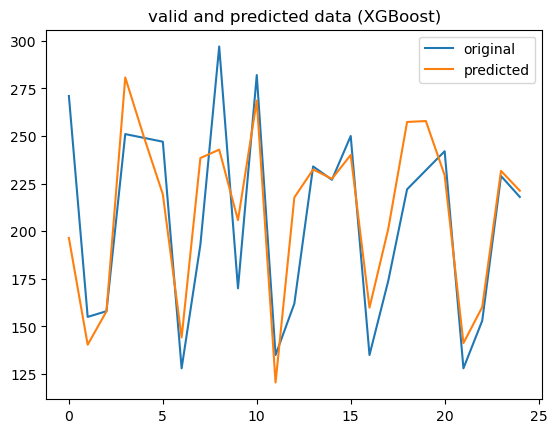

In [177]:
x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_predict_xgbr, label="predicted")
plt.title("valid and predicted data (XGBoost)")
plt.legend()
plt.show()

#### Random forest

In [124]:
# rf = RandomForestRegressor(n_estimators = 300, criterion = 'mse', max_depth = None, 
#                                min_samples_split = 2, min_samples_leaf = 1)

rf = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_depth = 5, 
                               min_samples_split = 8, min_samples_leaf = 1)

rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_val)
y_train_predict_rf = rf.predict(X_train)

In [134]:
r2_rf = r2_score(y_val,y_predict_rf)
print('R Squared value = ', r2_rf)

rmse_rf = np.sqrt(mean_squared_error(y_val,y_predict_rf))
print('RMSE =', rmse_rf)

mse_rf = mean_squared_error(y_val, y_predict_rf)
print('MSE =', mse_rf)

mae_rf = mean_absolute_error(y_val, y_predict_rf)
print('MAE =', mae_rf)

R Squared value =  0.6317047656085704
RMSE = 30.774028785816256
MSE = 947.0408477102476
MAE = 19.789246628087973


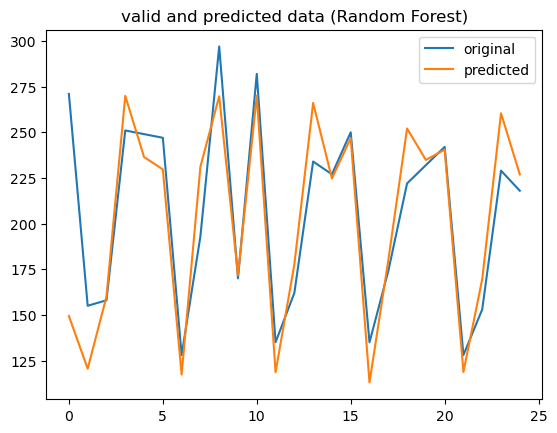

In [178]:
x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_predict_rf, label="predicted")
plt.title("valid and predicted data (Random Forest)")
plt.legend()
plt.show()

#### voting regressor

In [153]:
from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor([("gb", xgbr), ("lr", model_LR), ('rf', rf)])
ereg.fit(X, y)

pred4 = ereg.predict(X_val)


In [157]:
pred4 = ereg.predict(X_test)

In [148]:
r2_vr = r2_score(y_test,pred41)
print('R Squared value = ', r2_vr)

rmse_vr = np.sqrt(mean_squared_error(y_test,pred41))
print('RMSE =', rmse_vr)

mse_vr = mean_squared_error(y_test, pred41)
print('MSE =', mse_vr)

mae_vr = mean_absolute_error(y_test, pred41)
print('MAE =', mae_vr)

R Squared value =  0.9645458726317916
RMSE = 9.20624127218712
MSE = 84.75487836172151
MAE = 8.173446851487295


In [156]:
r2_vr = r2_score(y_val,pred4)
print('R Squared value = ', r2_vr)

rmse_vr = np.sqrt(mean_squared_error(y_val,pred4))
print('RMSE =', rmse_vr)

mse_vr = mean_squared_error(y_val, pred4)
print('MSE =', mse_vr)

mae_vr = mean_absolute_error(y_val, pred4)
print('MAE =', mae_vr)

R Squared value =  0.8855877209835172
RMSE = 17.152310279349965
MSE = 294.20174791909454
MAE = 11.815878272490872


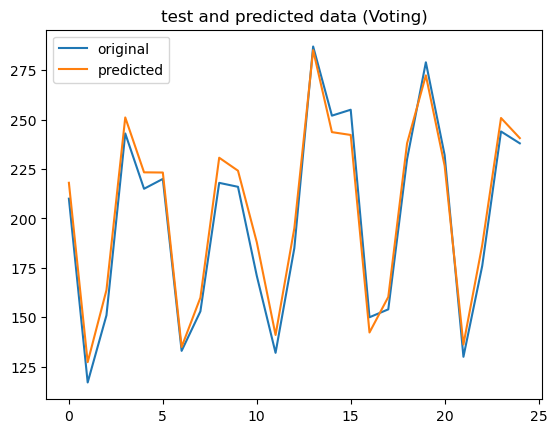

In [118]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred41, label="predicted")
plt.title("test and predicted data (Voting)")
plt.legend()
plt.show()

In [46]:
pred4

array([215.42485668, 125.45914029, 139.20527229, 241.42221286,
       247.92413129, 236.71454568, 131.14569528, 185.13499093,
       275.87362723, 177.55967491, 273.28823208, 131.82744277,
       161.41656983, 239.9059178 , 232.52888408, 247.80077643,
       134.40059305, 170.84226835, 229.16548784, 233.72248152,
       237.654077  , 129.75600551, 160.96384015, 231.01057318,
       221.88412021])

In [50]:
prediction_frame = pd.DataFrame(data=list(pred4),columns=['all'])
prediction_frame['Actual']=y
prediction_frame

,all,Actual
0,215.424857,181.0
1,125.459140,95.0
2,139.205272,82.0
3,241.422213,242.0
4,247.924131,164.0
5,236.714546,191.0
6,131.145695,115.0
7,185.134991,122.0
8,275.873627,159.0
9,177.559675,141.0
